Name: ENJAL CHAUHAN  
Course: Advanced Big Data and Data Mining (MSCS-634-M20). 
Lab Assignment: Wine Classification using KNN and Radius Neighbors  

## Step 1: Data Preparation and Exploration

The Wine dataset was obtained from the sklearn library. It comprises chemical analysis features of wines originating from three distinct cultivars.

Prior to model development, an initial exploratory analysis was conducted to assess the dataset.

• The dimensions of the dataset  
• Summary statistics of the features  
• The distribution of classes  

Feature scaling was performed using StandardScaler, as both KNN and Radius Neighbors algorithms depend on distance calculations. Without scaling, features with larger numeric ranges may disproportionately influence distance measurements and adversely affect model performance.

The dataset was divided into 80% training and 20% testing subsets to provide adequate data for model training and to retain a portion of data for unbiased evaluation.

In [7]:
# import required libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import pandas as pd

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Data exploration
df.info()

# Exploration
print("Dataset Shape:", df.shape)
print("\nStatistical Summary:\n", df.describe())
print("\nClass Distribution:", Counter(y))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<class 'pandas.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  target          

## Step 2: K-Nearest Neighbors (KNN)

The KNN classifier was tested using k values of 1, 5, 11, 15, and 21.

These values were chosen to see how the classifier performs under different conditions:

• How the model behaves with very low k, which can lead to overfitting  
• What happens at moderate k values, where there is a balance between bias and variance  
• The effect of higher k values, which can cause oversmoothing  

Accuracy was used to measure how well the classifier performed on the test data.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

print("KNN Results:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")


KNN Results:
k = 1, Accuracy = 0.9722
k = 5, Accuracy = 0.9722
k = 11, Accuracy = 1.0000
k = 15, Accuracy = 1.0000
k = 21, Accuracy = 1.0000


## Step 3: Radius Neighbors (RNN)

The Radius Neighbors classifier was applied using radius values of 350, 400, 450, 500, 550, and 600.

These radius values were selected to evaluate the effect of increasing neighborhood size on classification performance.

In contrast to the k-nearest neighbors (KNN) algorithm, the radius neighbors (RNN) method selects all neighbors within a specified radius, resulting in a variable number of neighbors for each data point.

Outlier handling was addressed by applying the 'most_frequent' labeling strategy to mitigate prediction errors when no neighbors are identified within the specified radius.


In [9]:
from sklearn.neighbors import RadiusNeighborsClassifier
import numpy as np

radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

print("\nRNN Results:")
for r in radius_values:
    try:
        rnn = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
        rnn.fit(X_train, y_train)
        y_pred = rnn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
    except Exception as e:
        acc = np.nan
        print(f"Radius = {r}, Error: {e}")

    rnn_accuracies.append(acc)
    print(f"Radius = {r}, Accuracy = {acc}")



RNN Results:
Radius = 350, Accuracy = 0.3888888888888889
Radius = 400, Accuracy = 0.3888888888888889
Radius = 450, Accuracy = 0.3888888888888889
Radius = 500, Accuracy = 0.3888888888888889
Radius = 550, Accuracy = 0.3888888888888889
Radius = 600, Accuracy = 0.3888888888888889


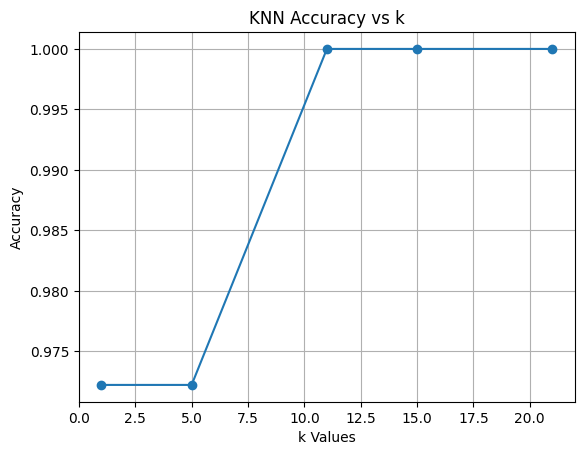

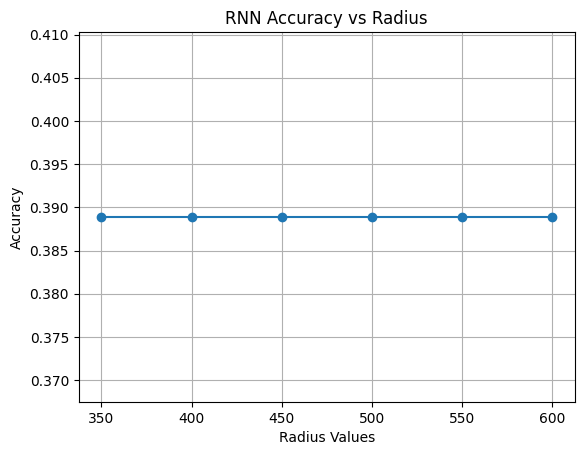

In [10]:
import matplotlib.pyplot as plt

# KNN Plot
plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel("k Values")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.grid()
plt.show()

# RNN Plot
plt.figure()
plt.plot(radius_values, rnn_accuracies, marker='o')
plt.xlabel("Radius Values")
plt.ylabel("Accuracy")
plt.title("RNN Accuracy vs Radius")
plt.grid()
plt.show()

## Model Comparison and Insights

The KNN model demonstrated stable performance across moderate k values. Very
small k values may lead to overfitting, while larger k values can oversmooth
class boundaries.

The RNN model showed sensitivity to radius selection. Smaller radius values may
result in insufficient neighbors, whereas excessively large radius values may
include too many points, reducing classification precision.

Overall:

• KNN provided more consistent accuracy trends  
• RNN required careful radius tuning  
• Feature scaling significantly improved both models  

### When to Prefer Each Model

KNN is preferable when a fixed number of neighbors is desired and the dataset is
well-scaled.

RNN is useful when natural distance thresholds exist or when adaptive neighbor
selection is beneficial.
